## Outlier Analysis 

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [5]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None, names=column_names)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

print("Column Names:")
print(column_names)
print("\nData:")
print(raw_df)

Column Names:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Data:
           CRIM     ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0       0.00632  18.00   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00   NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60   NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...   ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90   NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00   NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011

In [7]:
raw_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,NaN,NaN,NaN
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,NaN,NaN,NaN
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,NaN,NaN,NaN


### Discover outlier with vistualization tools 

#### Using Boxplot

<Axes: xlabel='DIS'>

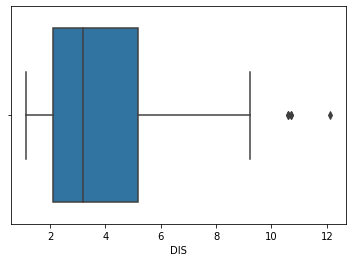

In [8]:
import seaborn as sns 
sns.boxplot(x=raw_df['DIS'])
#point between 10 to 12, these are outliers

#### Using Scatter plot

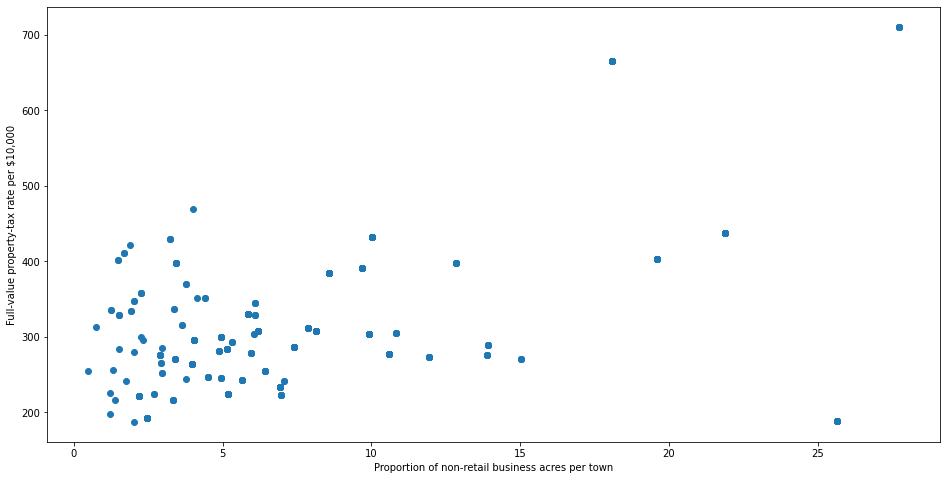

In [9]:
#import matplotlib module for ploting scatterplot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(raw_df['INDUS'], raw_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

#points which are far from the population  are outliers

#### Discover outliers with mathematical function

##### Using Z-score

In [11]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(raw_df))
print(z)

          CRIM        ZN     INDUS  CHAS  NOX  RM  AGE  DIS  RAD  TAX  \
0     0.957975  0.347499  1.466008   NaN  NaN NaN  NaN  NaN  NaN  NaN   
1     1.152714  0.407625  0.723195   NaN  NaN NaN  NaN  NaN  NaN  NaN   
2     0.957863  0.696451  0.985574   NaN  NaN NaN  NaN  NaN  NaN  NaN   
3     1.152714  0.166356  0.480959   NaN  NaN NaN  NaN  NaN  NaN  NaN   
4     0.957863  0.696451  0.985574   NaN  NaN NaN  NaN  NaN  NaN  NaN   
...        ...       ...       ...   ...  ...  ..  ...  ...  ...  ...   
1007  1.152714  0.369347  0.713101   NaN  NaN NaN  NaN  NaN  NaN  NaN   
1008  0.957426  0.696451  0.495048   NaN  NaN NaN  NaN  NaN  NaN  NaN   
1009  1.134367  0.320629  0.521332   NaN  NaN NaN  NaN  NaN  NaN  NaN   
1010  0.957756  0.696451  0.495048   NaN  NaN NaN  NaN  NaN  NaN  NaN   
1011  1.152714  0.239433  0.498076   NaN  NaN NaN  NaN  NaN  NaN  NaN   

      PTRATIO   B  LSTAT  MEDV  
0         NaN NaN    NaN   NaN  
1         NaN NaN    NaN   NaN  
2         NaN NaN    NaN

In [12]:
#define a threshold to identify an outlier
threshold = 3
print(np.where(z > 3))

(array([ 78,  80, 108, 110, 112, 114, 130, 132, 323, 325, 327, 333, 373,
       390, 391, 392, 394, 396, 398, 400, 402, 404, 406, 407, 408, 409,
       451, 457, 467, 508, 510, 512, 515, 525, 535, 566, 567, 568, 572,
       580, 582, 584, 596, 598, 600, 694, 696, 706, 708, 710, 737, 739,
       741, 743, 745], dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int64))


In [ ]:
#The first array contains the list of row numbers and second array 
#respective column numbers, which mean z[78][1] have a Z-score higher than 3

##### Using IQR score

In [24]:
#find quantile
Q1 = raw_df.quantile(0.25)
Q3 = raw_df.quantile(0.75)
#formula for interquartile range 
IQR = Q3 - Q1
print(IQR)

CRIM       391.17717
ZN          16.78000
INDUS       13.51500
CHAS         0.00000
NOX          0.17500
RM           0.73800
AGE         49.05000
DIS          3.08825
RAD         20.00000
TAX        387.00000
PTRATIO      2.80000
B                NaN
LSTAT            NaN
MEDV             NaN
dtype: float64


##### Working with Outliers: Correcting, Removing

In [ ]:
raw_df_o = raw_df[(z < 3).all(axis=1)]

In [27]:
#result with outlier
raw_df.shape

(1012, 14)